(vis-opsd-when2heat)=
# Visualisierung der Daten von OPSD-When2Heat

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import os.path
import platform
from PIL import Image
import requests
import scipy
from scipy.optimize import curve_fit
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('platform', platform.__version__)
print('Image', Image.__version__)
print('requests', requests.__version__)
print('scipy', scipy.__version__)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.3
datetime <module 'datetime' from 'C:\\Users\\andre\\anaconda3\\envs\\SYE-env\\lib\\datetime.py'>
seaborn 0.11.2
plotly 5.4.0
sys 3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]
os <module 'os' from 'C:\\Users\\andre\\anaconda3\\envs\\SYE-env\\lib\\os.py'>
platform 1.0.8
Image 8.3.1
requests 2.26.0
scipy 1.7.1


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    #pd.set_option('display.latex.repr', True)
    #pd.set_option('display.latex.longtable', True)
    #plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

## Darstellung der Daten

Die Daten stammen von {cite:p}`ruhnau_when2heat_2019` ([DOI](https://doi.org/10.25832/when2heat/2019-08-06)) und sind unter einer [Creative Commons Attribution 4.0 International license](https://creativecommons.org/licenses/by/4.0/) veröffentlicht.

Hier werden Daten zum Heizbedarf in deutschen Einfamilienhaushalten [MW] dargestellt:

__als Zeitreihe:__

In [3]:
heatData = pd.read_csv('https://data.open-power-system-data.org/when2heat/2019-08-06/when2heat.csv',
                       sep=';', usecols=['DE_heat_demand_space_SFH', 'utc_timestamp'])

In [4]:
heatData.rename(columns={col: col.replace('_', ' ') for col in heatData.columns}, inplace=True)
heatData.set_index('utc timestamp', inplace=True)
heatData.index = pd.to_datetime(heatData.index)

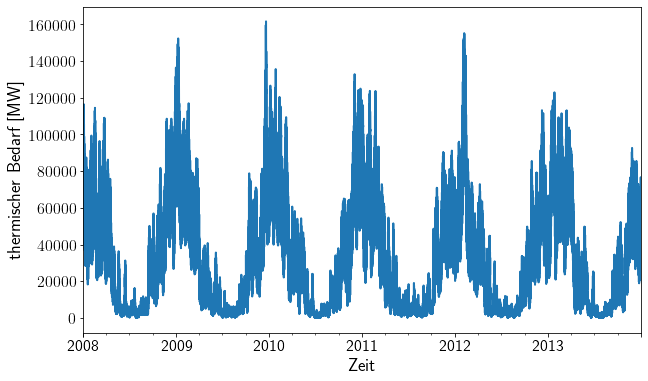

In [5]:
# fehlen paar Werte => weg mit
heatData.dropna(inplace=True)
heatData.plot(xlabel='Zeit', ylabel='thermischer Bedarf [MW]', legend=False);

Es fällt auf, dass es 2010 und 2012 scheinbar kältere Winter gab.

__als Dauerlinie:__

In [6]:
heatDataSorted = heatData.sort_values(by='DE heat demand space SFH', ascending=False, ignore_index=True)

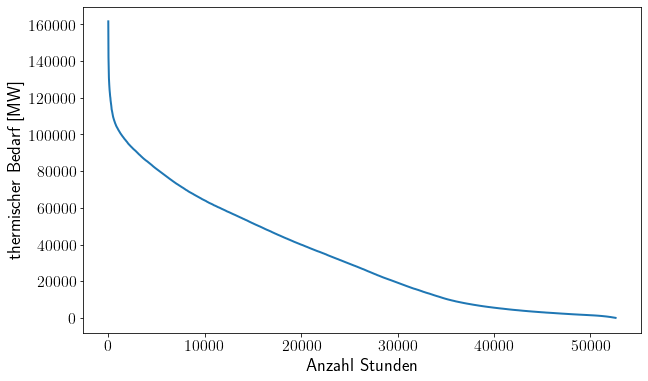

In [7]:
heatDataSorted.plot(xlabel='Anzahl Stunden', ylabel='thermischer Bedarf [MW]', legend=False);

__als heatmap:__

In [8]:
heatData2013 = pd.DataFrame(heatData.loc['2013', :])

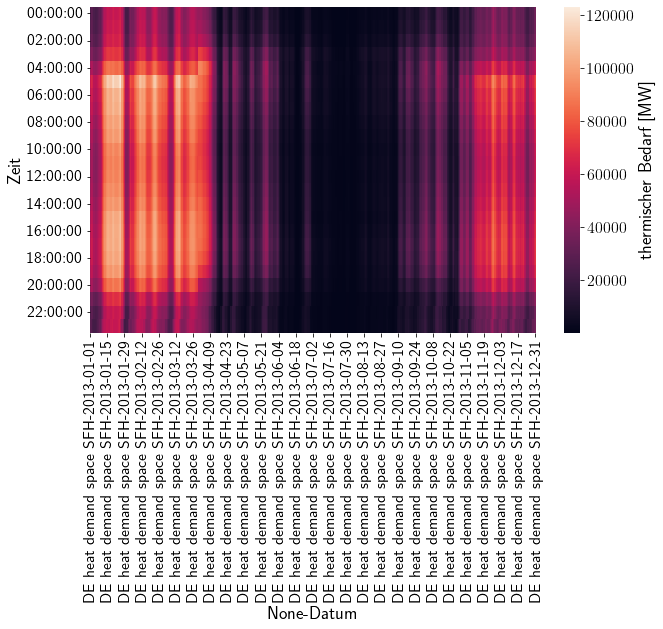

In [11]:
heatData2013['Datum'] = heatData2013.index.date
heatData2013['Zeit'] = heatData2013.index.time
heatData2013Piv = heatData2013.pivot(index='Zeit', columns='Datum')
sns.heatmap(heatData2013Piv, cbar_kws={'label': 'thermischer Bedarf [MW]'});

Hier ist zu sehen, dass im Sommer nur sehr viel weniger geheizt werden muss. Im Winter ist die Nachtabschaltung zu erkennen.

```{bibliography}
:filter: docname in docnames
```